In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = {
    "Initial Moisture (Trial1)": {
        1: [
            [(65, 3.30), (66, 3.30)],
            [(65, 3.10), (65, 3.30)],
            [(65, 3.30), (64, 3.40)],
            [(66, 3.30), (64, 3.50)],
            [(67, 3.00), (65, 3.30)],
        ],
        2: [
            [(67, 3.20), (66, 3.10)],
            [(67, 3.30), (63, 3.40)],
            [(66, 3.20), (63, 3.30)],
            [(67, 3.30), (66, 3.30)],
            [(65, 3.40), (67, 3.20)],
        ],
        3: [
            [(71, 3.00), (68, 3.40)],
            [(68, 3.20), (69, 3.20)],
            [(68, 3.30), (70, 3.20)],
            [(69, 3.20), (70, 3.40)],
            [(68, 3.20), (70, 3.20)],
        ],
    },
    "6 hours": {
        1: [
            [(69, 4.30), (68, 4.40)],
            [(69, 4.20), (67, 4.70)],
            [(69, 4.20), (67, 4.50)],
            [(68, 4.30), (68, 4.40)],
            [(68, 4.20), (67, 4.30)],
        ],
        2: [
            [(71, 4.30), (69, 4.20)],
            [(69, 4.60), (69, 4.30)],
            [(69, 4.30), (69, 4.50)],
            [(68, 4.50), (69, 4.40)],
            [(68, 4.60), (68, 4.40)],
        ],
        3: [
            [(69, 4.40), (69, 4.60)],
            [(69, 4.50), (69, 4.70)],
            [(70, 4.30), (69, 5.00)],
            [(69, 4.40), (69, 4.50)],
            [(68, 4.50), (69, 4.50)],
        ],
    },
    "7 hours": {
        1: [
            [(69, 4.50), (69, 4.50)],
            [(68, 4.60), (69, 4.60)],
            [(68, 4.50), (69, 4.50)],
            [(68, 4.60), (68, 4.80)],
            [(69, 4.40), (68, 4.60)],
        ],
        2: [
            [(69, 4.70), (69, 4.90)],
            [(69, 4.70), (69, 5.10)],
            [(68, 4.70), (69, 4.80)],
            [(68, 4.70), (69, 5.00)],
            [(68, 4.80), (68, 4.60)],
        ],
        3: [
            [(70, 4.50), (70, 4.80)],
            [(69, 4.50), (68, 4.80)],
            [(69, 4.60), (67, 4.90)],
            [(69, 4.50), (69, 4.80)],
            [(69, 4.90), (68, 4.80)],
        ],
    },
    "8 hours": {
        1: [
            [(68, 5.20), (67, 4.80)],
            [(69, 4.90), (67, 4.60)],
            [(69, 5.00), (68, 4.60)],
            [(68, 5.20), (68, 4.70)],
            [(68, 5.00), (68, 4.80)],
        ],
        2: [
            [(69, 4.90), (68, 4.70)],
            [(68, 5.00), (68, 4.80)],
            [(68, 5.10), (68, 5.10)],
            [(67, 5.00), (68, 4.60)],
            [(68, 5.10), (68, 5.00)],
        ],
        3: [
            [(70, 5.30), (69, 5.20)],
            [(69, 5.40), (67, 5.20)],
            [(69, 5.00), (69, 4.80)],
            [(69, 4.90), (69, 4.90)],
            [(68, 5.10), (68, 4.90)],
        ],
    },
    "9 hours": {
        1: [
            [(68, 5.30), (68, 5.00)],
            [(68, 5.60), (68, 5.30)],
            [(68, 5.20), (68, 5.10)],
            [(68, 5.30), (68, 4.90)],
            [(68, 5.10), (68, 5.00)],
        ],
        2: [
            [(71, 5.20), (69, 5.30)],
            [(70, 5.40), (69, 5.10)],
            [(70, 5.30), (69, 5.00)],
            [(70, 5.10), (69, 5.10)],
            [(69, 5.20), (68, 5.00)],
        ],
        3: [
            [(71, 5.30), (68, 5.30)],
            [(71, 5.40), (69, 5.20)],
            [(70, 5.50), (68, 5.40)],
            [(68, 5.70), (68, 5.20)],
            [(68, 5.40), (68, 5.40)],
        ],
    },
    "10 hours": {
        1: [
            [(68, 5.30), (68, 5.00)],
            [(68, 5.60), (68, 5.30)],
            [(68, 5.20), (68, 5.10)],
            [(68, 5.30), (68, 4.90)],
            [(68, 5.10), (68, 5.00)],
        ],
        2: [
            [(71, 5.20), (69, 5.30)],
            [(70, 5.40), (69, 5.10)],
            [(70, 5.30), (69, 5.00)],
            [(70, 5.10), (69, 5.10)],
            [(69, 5.20), (68, 5.00)],
        ],
        3: [
            [(71, 5.30), (68, 5.30)],
            [(71, 5.40), (69, 5.20)],
            [(70, 5.50), (68, 5.40)],
            [(68, 5.70), (68, 5.20)],
            [(68, 5.40), (68, 5.40)],
        ],
    },
    "Initial Moisture (Trial2)": {
        1: [
            [(67, 3.20), (66, 3.50)],
            [(65, 3.30), (63, 3.50)],
            [(67, 3.10), (63, 3.50)],
            [(67, 3.20), (65, 3.50)],
            [(68, 3.30), (64, 3.40)],
        ],
        2: [
            [(68, 3.20), (68, 3.30)],
            [(69, 3.30), (68, 3.30)],
            [(68, 3.40), (68, 3.30)],
            [(68, 3.30), (68, 3.30)],
            [(67, 3.30), (67, 3.30)],
        ],
        3: [
            [(67, 3.30), (68, 3.30)],
            [(66, 3.40), (68, 3.30)],
            [(67, 3.40), (69, 3.30)],
            [(67, 3.50), (69, 3.40)],
            [(68, 3.30), (68, 3.00)],
        ],
    },
    "14 hours": {
        1: [
            [(69, 6.80), (68, 6.70)],
            [(67, 7.00), (68, 6.60)],
            [(68, 6.80), (68, 6.70)],
            [(67, 6.70), (68, 6.40)],
            [(67, 6.90), (67, 6.60)],
        ],
        2: [
            [(68, 6.10), (68, 6.60)],
            [(67, 6.00), (67, 6.70)],
            [(66, 6.40), (67, 6.90)],
            [(67, 6.30), (67, 6.70)],
            [(67, 6.00), (68, 6.40)],
        ],
        3: [
            [(70, 5.70), (70, 6.50)],
            [(70, 6.00), (69, 6.30)],
            [(70, 5.90), (68, 6.40)],
            [(70, 5.60), (68, 6.70)],
            [(69, 5.80), (68, 6.60)],
        ],
    },
    "15 hours": {
        1: [
            [(68, 7.20), (69, 7.30)],
            [(68, 7.20), (69, 6.80)],
            [(67, 7.10), (68, 7.00)],
            [(68, 7.50), (68, 6.90)],
            [(68, 7.10), (68, 7.20)],
        ],
        2: [
            [(70, 6.60), (68, 6.60)],
            [(68, 6.70), (67, 6.60)],
            [(67, 6.70), (67, 6.80)],
            [(68, 6.50), (68, 6.70)],
            [(68, 6.80), (68, 6.60)],
        ],
        3: [
            [(69, 5.90), (69, 6.30)],
            [(67, 6.10), (69, 6.20)],
            [(68, 6.10), (68, 6.40)],
            [(68, 5.90), (69, 6.40)],
            [(68, 6.20), (69, 6.30)],
        ],
    },
    "16 hours": {
        1: [
            [(68, 6.90), (69, 6.90)],
            [(68, 6.70), (69, 6.90)],
            [(68, 7.00), (68, 6.70)],
            [(68, 6.80), (68, 7.00)],
            [(68, 6.80), (67, 7.20)],
        ],
        2: [
            [(67, 6.60), (68, 7.00)],
            [(67, 6.80), (68, 6.90)],
            [(69, 6.40), (68, 7.30)],
            [(68, 6.60), (68, 7.50)],
            [(68, 6.60), (67, 7.40)],
        ],
        3: [
            [(67, 6.30), (68, 6.70)],
            [(68, 6.20), (68, 6.80)],
            [(67, 6.30), (68, 6.90)],
            [(68, 6.20), (68, 6.80)],
            [(68, 6.20), (68, 6.70)],
        ],
    },
    "17 hours": {
        1: [
            [(70, 6.90), (68, 7.00)],
            [(68, 7.20), (68, 7.10)],
            [(67, 6.90), (68, 7.00)],
            [(68, 7.30), (68, 7.00)],
            [(67, 6.90), (68, 7.00)],
        ],
        2: [
            [(70, 7.00), (69, 7.00)],
            [(69, 6.90), (69, 6.90)],
            [(69, 7.10), (68, 7.00)],
            [(69, 7.00), (69, 7.00)],
            [(68, 7.00), (68, 7.00)],
        ],
        3: [
            [(71, 6.70), (70, 6.50)],
            [(70, 7.00), (68, 6.50)],
            [(68, 7.00), (67, 6.60)],
            [(67, 7.10), (68, 6.60)],
            [(68, 7.00), (67, 6.60)],
        ],
    },
    "18 hours": {
        1: [
            [(69, 7.40), (68, 7.10)],
            [(69, 7.10), (68, 7.10)],
            [(68, 7.20), (68, 7.20)],
            [(67, 7.40), (67, 7.10)],
            [(68, 7.30), (67, 7.20)],
        ],
        2: [
            [(70, 7.40), (71, 7.20)],
            [(70, 7.10), (70, 7.70)],
            [(70, 7.10), (68, 7.80)],
            [(69, 7.30), (68, 7.50)],
            [(69, 7.20), (68, 7.40)],
        ],
        3: [
            [(67, 7.00), (68, 7.00)],
            [(67, 6.80), (68, 6.90)],
            [(67, 6.70), (67, 7.10)],
            [(68, 6.60), (67, 6.90)],
            [(68, 6.70), (67, 6.90)],
        ],
    },
    "Initial Moisture (Trial3)": {
        1: [
            [(66, 2.90), (68, 2.90)],
            [(66, 3.00), (68, 2.90)],
            [(64, 3.10), (69, 2.90)],
            [(65, 2.90), (69, 3.00)],
            [(65, 3.00), (69, 2.80)],
        ],
        2: [
            [(70, 2.90), (70, 2.90)],
            [(70, 3.00), (70, 3.00)],
            [(68, 2.90), (69, 2.90)],
            [(69, 2.90), (70, 3.00)],
            [(68, 3.00), (70, 3.00)],
        ],
        3: [
            [(69, 2.80), (70, 2.90)],
            [(70, 2.90), (68, 3.00)],
            [(70, 2.90), (70, 3.00)],
            [(67, 3.00), (68, 3.00)],
            [(67, 3.00), (69, 3.00)],
        ],
    },
    "26 hours": {
        1: [
            [(69, 7.80), (68, 8.70)],
            [(68, 8.00), (67, 8.80)],
            [(68, 7.70), (67, 8.40)],
            [(68, 7.80), (67, 8.80)],
            [(68, 7.80), (67, 8.40)],
        ],
        2: [
            [(77, 7.80), (70, 8.10)],
            [(77, 7.80), (69, 8.00)],
            [(69, 7.70), (69, 8.30)],
            [(68, 7.70), (69, 8.00)],
            [(68, 7.90), (68, 8.00)],
        ],
        3: [
            [(69, 8.40), (68, 8.30)],
            [(68, 8.10), (68, 8.00)],
            [(68, 8.60), (69, 8.10)],
            [(68, 8.20), (69, 8.10)],
            [(68, 8.40), (69, 8.00)],
        ],
    },
    "27 hours": {
        1: [
            [(69, 8.10), (69, 8.80)],
            [(68, 8.10), (68, 8.30)],
            [(67, 8.60), (68, 8.60)],
            [(68, 8.50), (68, 8.40)],
            [(68, 8.10), (67, 8.70)],
        ],
        2: [
            [(70, 8.10), (68, 8.30)],
            [(68, 8.00), (68, 8.60)],
            [(69, 8.30), (68, 8.60)],
            [(68, 8.20), (69, 8.50)],
            [(68, 8.60), (68, 8.50)],
        ],
        3: [
            [(70, 8.20), (69, 8.50)],
            [(70, 8.20), (69, 8.50)],
            [(70, 8.20), (69, 8.60)],
            [(70, 8.20), (69, 8.50)],
            [(70, 8.30), (69, 8.10)],
        ],
    },
    "28 hours": {
        1: [
            [(69, 8.60), (68, 8.80)],
            [(68, 8.50), (68, 9.20)],
            [(68, 8.50), (69, 8.90)],
            [(68, 8.70), (69, 8.90)],
            [(69, 8.30), (69, 8.90)],
        ],
        2: [
            [(70, 8.00), (68, 9.40)],
            [(69, 8.90), (69, 8.50)],
            [(69, 8.00), (69, 9.30)],
            [(69, 9.20), (68, 8.30)],
            [(68, 8.30), (69, 9.20)],
        ],
        3: [
            [(68, 8.40), (68, 8.70)],
            [(69, 8.50), (68, 8.80)],
            [(69, 8.00), (68, 8.20)],
            [(69, 8.30), (67, 8.80)],
            [(68, 8.20), (68, 8.70)],
        ],
    },
    "29 hours": {
        1: [
            [(70, 8.40), (69, 8.80)],
            [(68, 8.50), (68, 9.00)],
            [(68, 8.60), (68, 8.50)],
            [(68, 8.30), (68, 8.70)],
            [(69, 8.60), (68, 8.80)],
        ],
        2: [
            [(70, 8.70), (67, 9.10)],
            [(69, 8.90), (68, 8.70)],
            [(69, 8.10), (68, 8.60)],
            [(70, 8.10), (68, 8.70)],
            [(69, 8.10), (68, 8.60)],
        ],
        3: [
            [(70, 8.70), (67, 9.00)],
            [(69, 8.90), (68, 8.80)],
            [(68, 8.10), (69, 8.80)],
            [(67, 8.80), (68, 8.80)],
            [(68, 8.10), (69, 8.80)],
        ],
    },
    "30 hours": {
        1: [
            [(68, 9.20), (68, 8.90)],
            [(68, 9.40), (68, 9.30)],
            [(67, 9.30), (68, 8.80)],
            [(68, 9.40), (67, 8.50)],
            [(68, 9.40), (66, 8.90)],
        ],
        2: [
            [(69, 9.80), (68, 9.60)],
            [(68, 9.40), (67, 9.50)],
            [(68, 9.60), (68, 9.30)],
            [(68, 9.60), (67, 9.40)],
            [(68, 9.30), (68, 9.50)],
        ],
        3: [
            [(69, 8.50), (68, 8.70)],
            [(69, 8.50), (68, 8.60)],
            [(68, 9.80), (68, 9.60)],
            [(69, 8.50), (68, 8.60)],
            [(67, 8.20), (67, 8.50)],
        ],
    },
    "31 hours": {
        1: [
            [(69, 9.30), (67, 9.30)],
            [(66, 9.50), (66, 9.30)],
            [(67, 9.30), (66, 9.10)],
            [(67, 9.50), (67, 9.30)],
            [(67, 9.50), (67, 9.30)],
        ],
        2: [
            [(67, 8.50), (68, 9.00)],
            [(67, 8.70), (67, 9.00)],
            [(67, 9.20), (67, 9.20)],
            [(68, 9.10), (68, 8.60)],
            [(67, 8.90), (67, 8.90)],
        ],
        3: [
            [(68, 8.90), (69, 8.80)],
            [(68, 8.80), (67, 8.90)],
            [(68, 8.60), (67, 8.90)],
            [(68, 8.60), (66, 8.70)],
            [(67, 8.90), (67, 8.70)],
        ],
    },
}

rows = []


def get_trial(condition):
    # Determine trial based on the condition key
    if "Trial1" in condition or condition in ["6 hours", "7 hours", "8 hours", "9 hours", "10 hours"]:
        return 1
    elif "Trial2" in condition or condition in ["14 hours", "15 hours", "16 hours", "17 hours", "18 hours"]:
        return 2
    elif "Trial3" in condition or condition in ["26 hours", "27 hours", "28 hours", "29 hours", "30 hours", "31 hours"] or "Initial Moisture (Trial3)" in condition:
        return 3
    else:
        return None


def get_soaking_time(condition):
    # For initial measurements, use 0; otherwise, extract the first token as the numeric time
    if "Initial Moisture" in condition:
        return 0
    try:
        return int(condition.split()[0])
    except:
        return None


for condition, bags in data.items():
    trial = get_trial(condition)
    soaking_time = get_soaking_time(condition)
    for bag, meas_list in bags.items():
        for m_idx, meas in enumerate(meas_list, start=1):
            for s_idx, (temp, mc) in enumerate(meas, start=1):
                rows.append({"Condition": condition, "Trial": trial, "SoakingTime": soaking_time, "Bag": bag, "Measurement": m_idx, "Sample": s_idx, "Temp": temp, "MC%": mc})

df = pd.DataFrame(rows)

baseline = {}

for trial in df["Trial"].unique():
    trial = int(trial)
    init_df = df[df["Condition"].str.contains("Initial Moisture") & (df["Trial"] == trial)]
    for bag in sorted(init_df["Bag"].unique()):
        bag_df = init_df[init_df["Bag"] == bag]
        baseline.setdefault(trial, {})[bag] = {"InitialTemp": bag_df["Temp"].mean(), "InitialMC": bag_df["MC%"].mean()}


def assign_baseline(row):
    trial = int(row["Trial"])
    bag = row["Bag"]
    base = baseline.get(trial, {}).get(bag, {"InitialTemp": None, "InitialMC": None})
    return pd.Series({"InitialTemp": base["InitialTemp"], "InitialMC": base["InitialMC"]})


df_baseline = df.apply(assign_baseline, axis=1)
df = pd.concat([df, df_baseline], axis=1)


df["DeltaTemp"] = df["Temp"] - df["InitialTemp"]
df["DeltaMC"] = df["MC%"] - df["InitialMC"]


df = df[["Trial", "SoakingTime", "Condition", "Bag", "Measurement", "Sample", "InitialTemp", "Temp", "DeltaTemp", "InitialMC", "MC%", "DeltaMC"]]

output_filename = "all_large_data.xlsx"
df.to_excel(output_filename, index=False)
print(f"Excel file '{output_filename}' created with {len(df)} rows.")
print(df.head(20))

Excel file 'all_large_data.xlsx' created with 570 rows.
    Trial  SoakingTime                  Condition  Bag  Measurement  Sample  \
0       1            0  Initial Moisture (Trial1)    1            1       1   
1       1            0  Initial Moisture (Trial1)    1            1       2   
2       1            0  Initial Moisture (Trial1)    1            2       1   
3       1            0  Initial Moisture (Trial1)    1            2       2   
4       1            0  Initial Moisture (Trial1)    1            3       1   
5       1            0  Initial Moisture (Trial1)    1            3       2   
6       1            0  Initial Moisture (Trial1)    1            4       1   
7       1            0  Initial Moisture (Trial1)    1            4       2   
8       1            0  Initial Moisture (Trial1)    1            5       1   
9       1            0  Initial Moisture (Trial1)    1            5       2   
10      1            0  Initial Moisture (Trial1)    2            1       1

In [8]:
df = pd.read_excel("all_large_data.xlsx")

print("First 10 rows:")
print(df.head(10))
print("\nDataFrame info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

First 10 rows:
   Trial  SoakingTime                  Condition  Bag  Measurement  Sample  \
0      1            0  Initial Moisture (Trial1)    1            1       1   
1      1            0  Initial Moisture (Trial1)    1            1       2   
2      1            0  Initial Moisture (Trial1)    1            2       1   
3      1            0  Initial Moisture (Trial1)    1            2       2   
4      1            0  Initial Moisture (Trial1)    1            3       1   
5      1            0  Initial Moisture (Trial1)    1            3       2   
6      1            0  Initial Moisture (Trial1)    1            4       1   
7      1            0  Initial Moisture (Trial1)    1            4       2   
8      1            0  Initial Moisture (Trial1)    1            5       1   
9      1            0  Initial Moisture (Trial1)    1            5       2   

   InitialTemp  Temp  DeltaTemp  InitialMC  MC%  DeltaMC  
0         65.2    65       -0.2       3.28  3.3     0.02  
1       

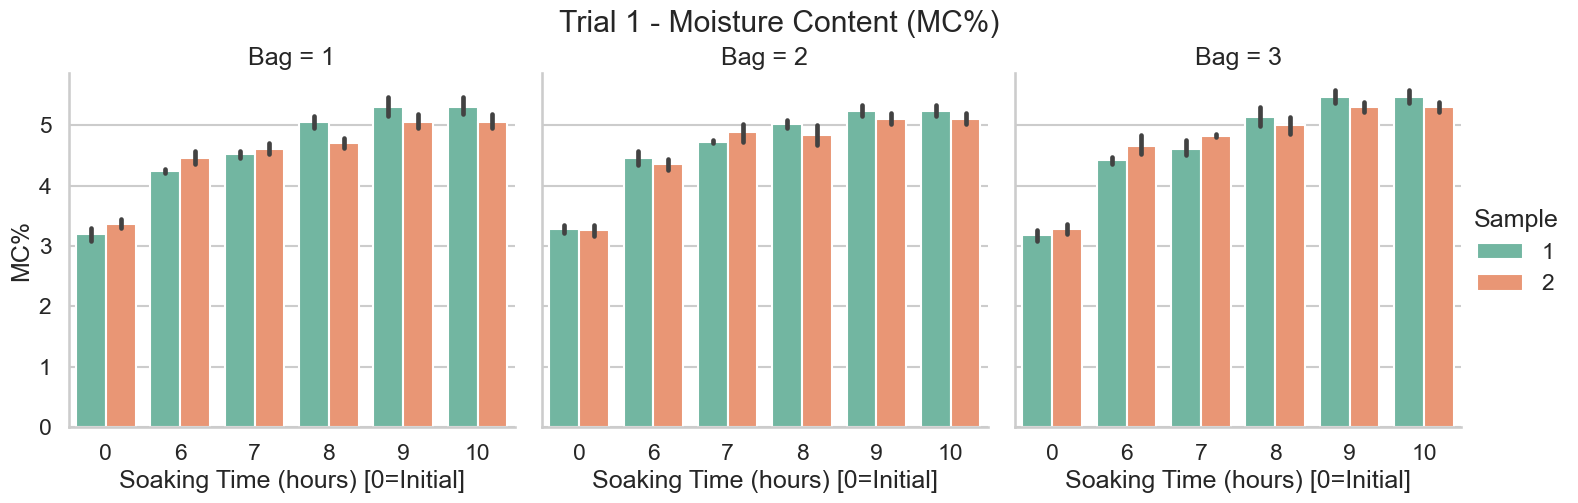

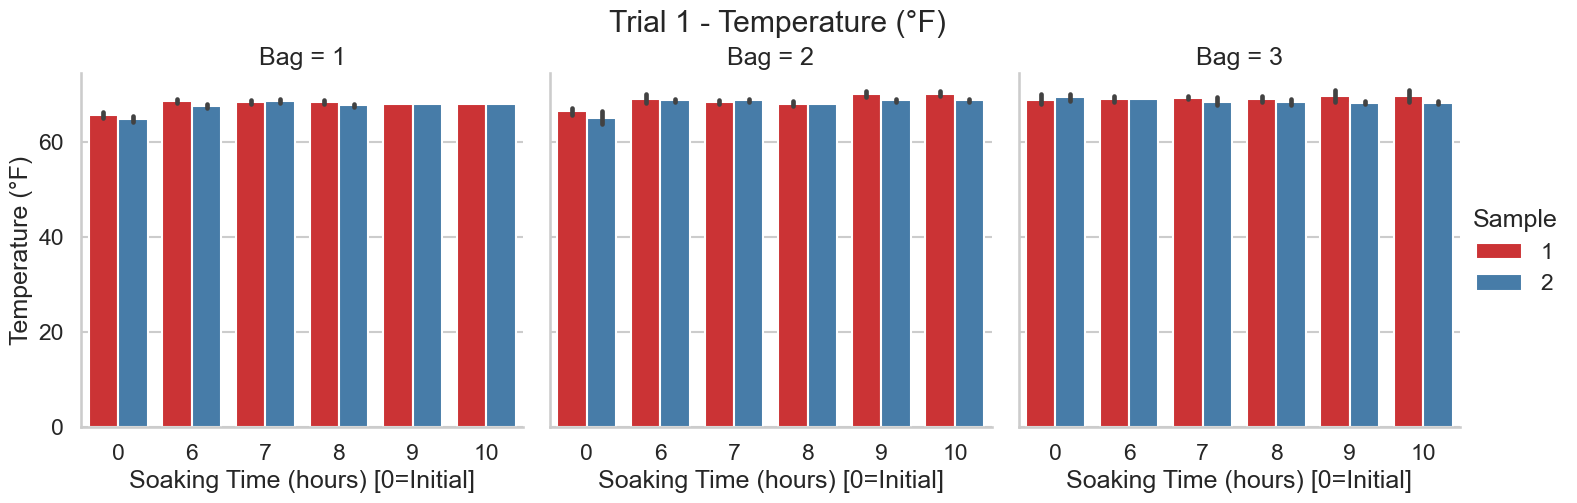

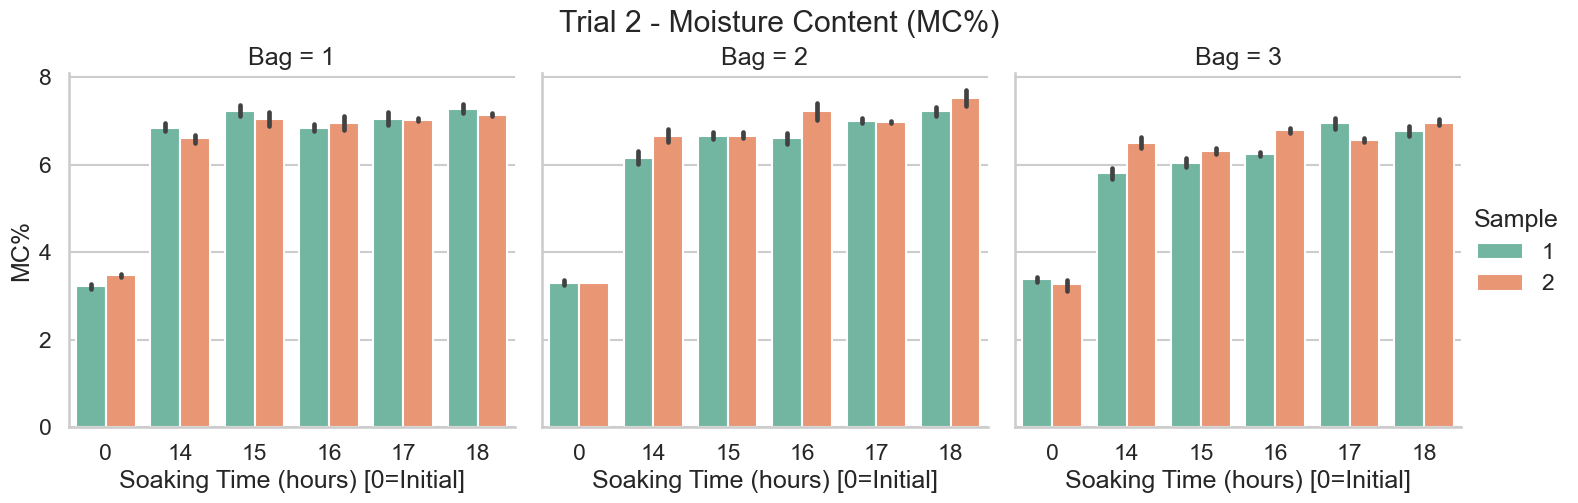

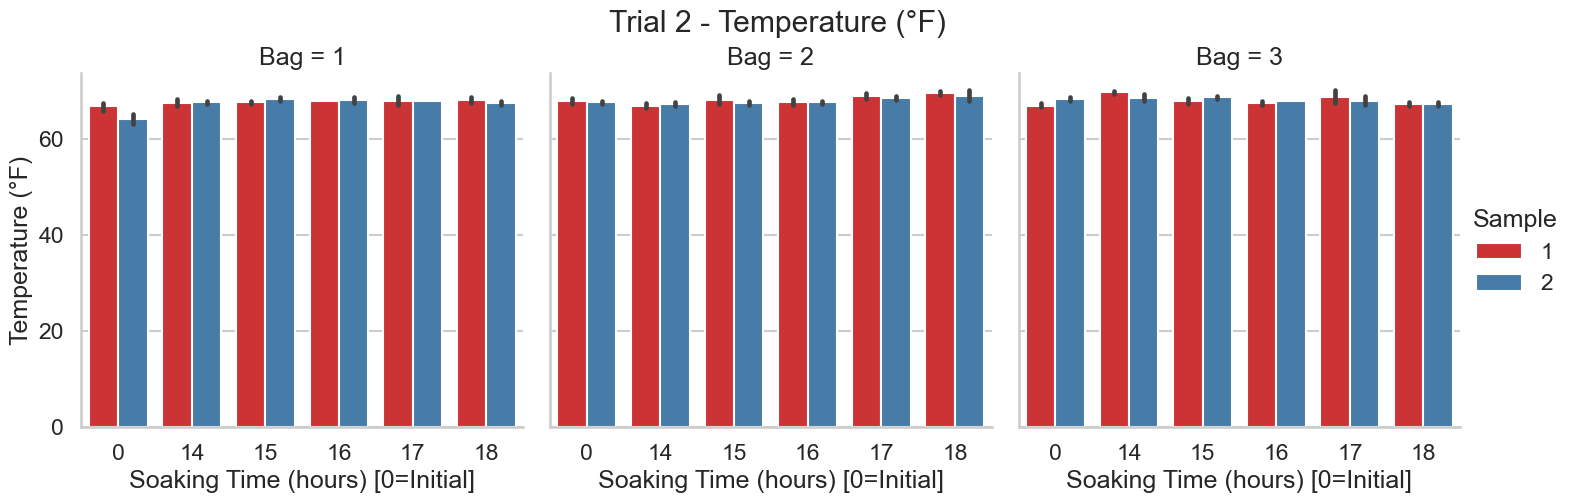

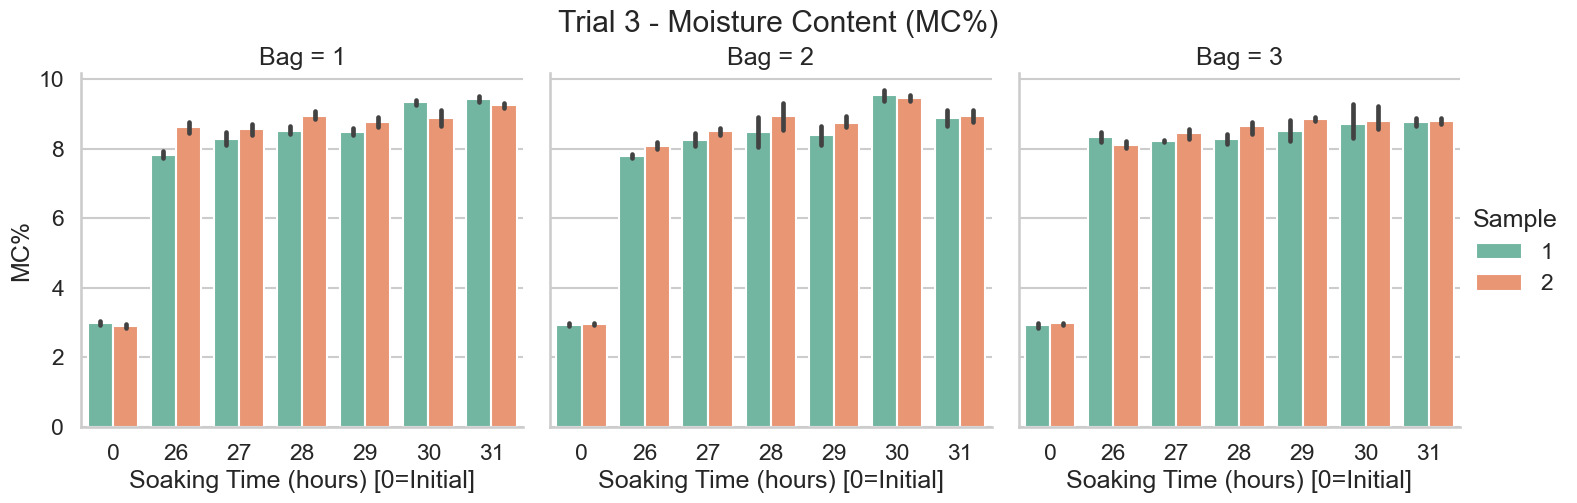

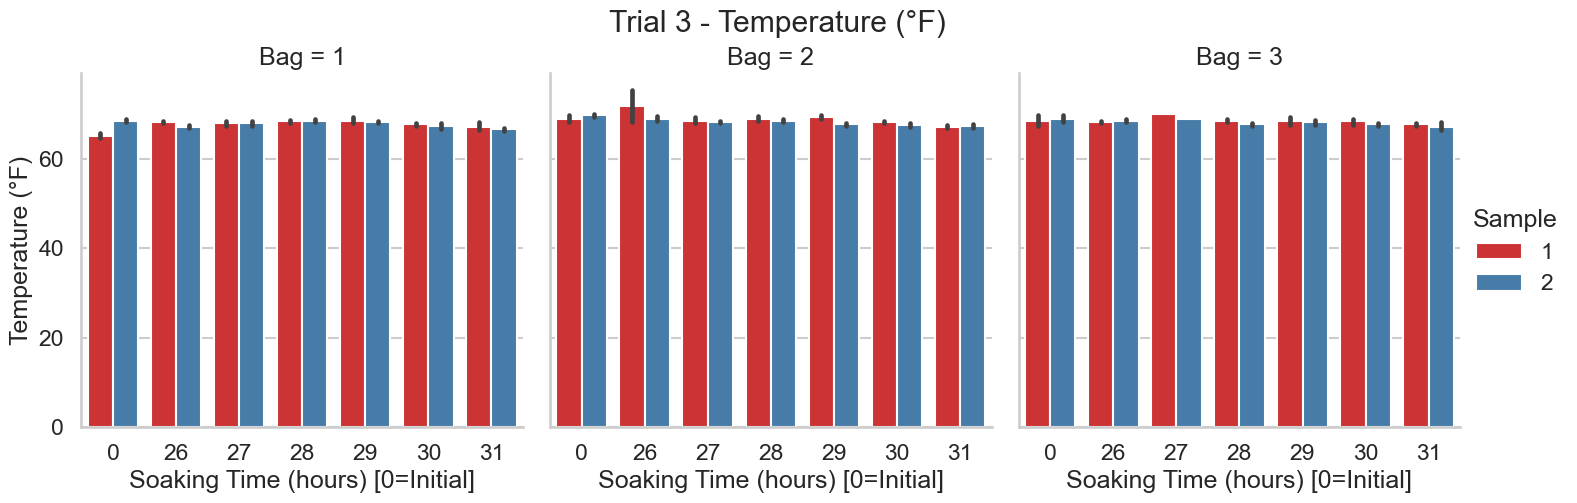

In [9]:
def analyze_raw_moisture_temperature(excel_file="all_data_with_delta.xlsx"):

    df = pd.read_excel(excel_file)

    sns.set(style="whitegrid", context="talk")

    # Sort so the bar charts go in ascending SoakingTime order
    df = df.sort_values(["Trial", "Bag", "SoakingTime", "Sample"])

    trials = df["Trial"].unique()

    for trial in trials:
        sub = df[df["Trial"] == trial]

        g1 = sns.catplot(data=sub, x="SoakingTime", y="MC%", hue="Sample", col="Bag", kind="bar", palette="Set2", height=5, aspect=1)
        g1.fig.suptitle(f"Trial {trial} - Moisture Content (MC%)", y=1.02)
        g1.set_axis_labels("Soaking Time (hours) [0=Initial]", "MC%")
        g1._legend.set_title("Sample")

        g2 = sns.catplot(data=sub, x="SoakingTime", y="Temp", hue="Sample", col="Bag", kind="bar", palette="Set1", height=5, aspect=1)
        g2.fig.suptitle(f"Trial {trial} - Temperature (°F)", y=1.02)
        g2.set_axis_labels("Soaking Time (hours) [0=Initial]", "Temperature (°F)")
        g2._legend.set_title("Sample")

        plt.show()


if __name__ == "__main__":
    analyze_raw_moisture_temperature("all_data_with_delta.xlsx")

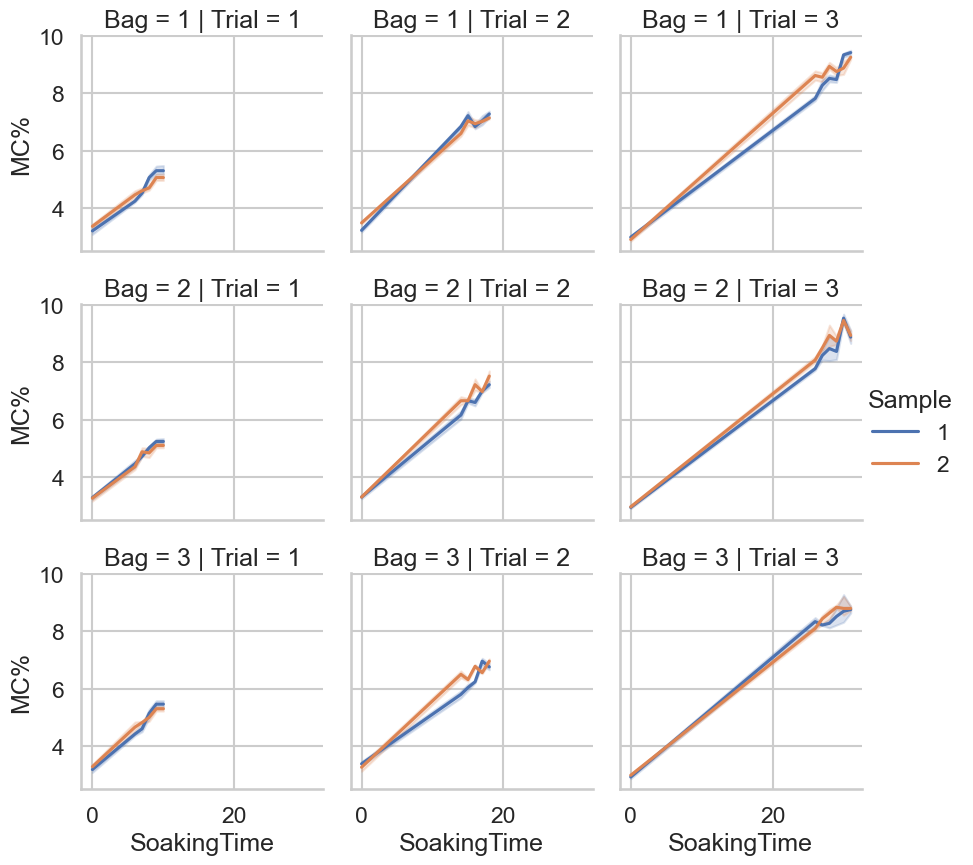

In [10]:
g = sns.FacetGrid(df, col="Trial", row="Bag", hue="Sample")
g.map(sns.lineplot, "SoakingTime", "MC%").add_legend()

In [17]:
import pandas as pd

# Load the entire dataset (assuming it is in one sheet)
df = pd.read_excel("all_data_with_delta.xlsx")

# For clarity, we assume the columns are named exactly as:
# ["Trial", "SoakingTime", "Condition", "Bag", "Measurement", "Sample",
#  "InitialTemp", "Temp", "DeltaTemp", "InitialMC", "MC%", "DeltaMC"]

# 1. Process initial moisture rows (SoakingTime == 0)
init_df = df[df["SoakingTime"] == 0].copy()

# We want one row per (Trial, Bag) with columns for each measurement (1 to 5)
# and we use only the Sample==1 (change if you prefer a different aggregation)
init_sample = init_df[init_df["Sample"] == 1].copy()

# Pivot so that measurements become separate columns
init_pivot = init_sample.pivot_table(index=["Trial", "Bag"], columns="Measurement", values="MC%", aggfunc="first").reset_index()

# Rename measurement columns to "initial moisture X"
for m in range(1, 6):
    init_pivot.rename(columns={m: f"initial moisture {m}"}, inplace=True)

# Compute average initial moisture (assuming exactly 5 measurements)
init_pivot["average initial moisture"] = init_pivot[[f"initial moisture {m}" for m in range(1, 6)]].mean(axis=1)

# 2. Process soaked data (SoakingTime != 0)
soak_df = df[df["SoakingTime"] != 0].copy()

# Again, choose Sample==1 for each measurement
soak_sample = soak_df[soak_df["Sample"] == 1].copy()

# Pivot so that for each (Trial, Bag, SoakingTime) we have measurements 1 to 5
soak_pivot = soak_sample.pivot_table(index=["Trial", "Bag", "SoakingTime"], columns="Measurement", values="MC%", aggfunc="first").reset_index()

# Rename measurement columns to "moisture X"
for m in range(1, 6):
    soak_pivot.rename(columns={m: f"moisture {m}"}, inplace=True)

# Compute average soaked moisture
soak_pivot["average moisture"] = soak_pivot[[f"moisture {m}" for m in range(1, 6)]].mean(axis=1)

# 3. Merge initial and soaked data (by Trial and Bag)
merged = pd.merge(soak_pivot, init_pivot, on=["Trial", "Bag"], how="left")

# 4. Select & order the final columns.
final_cols = ["SoakingTime", "initial moisture 1", "initial moisture 2", "initial moisture 3", "initial moisture 4", "initial moisture 5", "average initial moisture", "moisture 1", "moisture 2", "moisture 3", "moisture 4", "moisture 5", "average moisture"]

final_df = merged[final_cols].copy()

# (Optional) Sort by Trial, Bag, and SoakingTime if desired
final_df.sort_values(["Trial", "Bag", "SoakingTime"], inplace=True)

# Save to a new Excel file if you wish
final_df.to_excel("reshaped_moisture_data.xlsx", index=False)

# Preview the result
print(final_df.head(10))

KeyError: 'Trial'